In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
#設定預設繪圖大小(長,寬)
# plt.rcParams["figure.figsize"] = (20,10)

In [3]:
data_path = 'data/'
df = pd.read_csv(data_path + 'train.csv')

## 資料描述
- acidity 酸度
- citric_acid 檸檬酸
- sugar 糖
- total_sulfur_dioxide 二氧化硫(總)
- alcohol 酒精
- pH pH值
- free_sulfur_dioxide 二氧化硫(游離)
- quality 品質

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

In [ ]:
df.quality.value_counts()

## 資料前處理

### 極端值處理

#### 剔除 >平均數+3個標準差 及 <平均數-3個標準差的資料

In [4]:
n_std = 3
for x in list(df.columns):
    if x != 'quality' and df[x].dtype != 'object':
        df = df.loc[~(df[x] > df[x].mean()+df[x].std()*n_std) & ~(df[x] < df[x].mean()-df[x].std()*n_std), :]#.acidity.describe()
        print(f"{x}:{len(df)}")

acidity:1190
citric_acid:1189
sugar:1167
total_sulfur_dioxide:1148
pH:1131
free_sulfur_dioxide:1119


In [ ]:
# n_std = 3
# for x in list(df.columns):
#     if x != 'quality' and df[x].dtype != 'object':
#         head = df.loc[(df[x] > df[x].mean()+df[x].std()*n_std), :]#.acidity.describe()
#         tail = df.loc[(df[x] < df[x].mean()-df[x].std()*n_std), :]#.acidity.describe()

#         print(x, "drop", f"head:{len(head)}", f"tail:{len(tail)}")

### 缺失值處理

#### 數值型資料 -> 補中位數

In [5]:
df = df.fillna(df.median())

In [ ]:
# for x in list(df.columns):
#     if x != 'quality' and df[x].dtype != 'object':
#         q_50 = np.percentile(df[~df[x].isnull()][x], q = 50)
#         df.loc[df[x].isnull(),x] = q_50

#### 類別型資料 -> 自成一類

In [6]:
df.loc[df.alcohol == 'lowW', "alcohol"] = 'Low'
df.loc[df.alcohol.isnull(), "alcohol"] = 'unknown'
df.alcohol.value_counts()

Low        600
Medium     367
High       110
unknown     42
Name: alcohol, dtype: int64

## EDA

### X變數 描述統計量 & 直方圖

In [ ]:
for x in list(df.columns):
    print(x,'\n-----------------')
    print(df[x].describe())
    df[x].hist()
    plt.show()

### X變數 盒形圖

In [ ]:
for x in list(df.columns):
    if x != 'quality' and df[x].dtype != 'object':
        df.boxplot(x)
        plt.show()

### X與Y 盒形圖

In [ ]:
for x in df.columns:
    if x != 'quality' and df[x].dtype != 'object':
        print(x)
        plt.boxplot([df[df['quality']==0][x], df[df['quality']==1][x]], 
                    labels = ['quality=0', 'quality=1'])
        plt.ylabel(x)
        plt.show()

### X與Y 直方圖

In [ ]:
for x in df.columns:
    if x != 'quality' and df[x].dtype != 'object':
        print(x)
        df0 = df[df['quality']==0]
        df1 = df[df['quality']==1]
        plt.hist([df0[x], df1[x]], label = ['quality=0', 'quality=1'], stacked=False)#True
        plt.xlabel(x)
        plt.ylabel('number of data ')
        plt.legend()
        plt.show()

### X與Y 散佈圖

In [ ]:
for x in df.columns:
    if x != 'quality':# and df[x].dtype != 'object':
        print(x)
        plt.scatter("quality", x, data=df, alpha = 0.2)
        plt.xlabel('quality')
        plt.ylabel(x)
        plt.show()

### 相關分析

<AxesSubplot:>

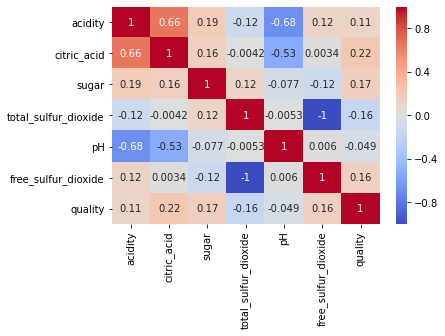

In [7]:
import seaborn as sns
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm',
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [8]:
x = df.drop('quality', axis = 1).copy()
y = df['quality'].copy()

In [10]:
#預測 y之最佳features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_regression,f_classif #卡方、相關、ANOVA

#apply SelectKBest class to extract top XXX best features
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfpvalues = pd.DataFrame(fit.pvalues_).apply(lambda x: round(x, 3))
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores,dfpvalues],axis=1)
featureScores.columns = ['Factor','Score','p-value']  #naming the dataframe columns
print(featureScores.nlargest(len(x.columns),'Score'))  #print XXX best features

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-87d7b93d4292>", line 3, in <module>
    from sklearn.feature_selection import SelectKBest
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\feature_selection\__init__.py", line 7, in <module>
    from .univariate_selection import chi2
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py", line 15, in <module>
    from ..preprocessing import LabelBinarizer
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py", line 6, in <module>
    from ._function_transformer import FunctionTransformer
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py", line 5, in <module>
    from ..utils.testing import ass

TypeError: attrib() got an unexpected keyword argument 'convert'

## Modeling